# <center> Course: CHE1147H - Data Mining in Engineering <center>
## <center> Programming Assignment 4: PAT <center>
    
#### <center> Yunjie Xu 1008601951<center> 

In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import MaxAbsScaler
import  seaborn as sns
from sklearn.cross_decomposition import PLSRegression

## 3 A PAT application
### Task #1 3.2 Description of the process

    A. Generate the plot of all the training set raw NIR data.

In [2]:
sawdust_train = pd.read_excel('sawdust_train.xlsx')
pd.set_option('display.max_columns', None)
sawdust_train.head()

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,w1138,w1139,w1140,w1141,w1142,w1143,w1144,w1145,w1146,w1147,w1148,w1149,w1150,w1151,w1152,w1153,w1154,w1155,w1156,w1157,w1158,w1159,w1160,w1161,w1162,w1163,w1164,w1165,w1166,w1167,w1168,w1169,w1170,w1171,w1172,w1173,w1174,w1175,w1176,w1177,w1178,w1179,w1180,w1181,w1182,w1183,w1184,w1185,w1186,w1187,w1188,w1189,w1190,w1191,w1192,w1193,w1194,w1195,w1196,w1197,w1198,w1199,w1200,w1201,w1202,w1203,w1204,w1205,w1206,w1207,w1208,w1209,w1210,w1211,w1212,w1213,w1214,w1215,w1216,w1217,w1218,w1219,w1220,w1221,w1222,w1223,w1224,w1225,w1226,w1227,w1228,w1229,w1230,w1231,w1232,w1233,w1234,w1235,w1236,w1237,w1238,w1239,w1240,w1241,w1242,w1243,w1244,w1245,w1246,w1247,w1248,w1249,w1250,w1251,w1252,w1253,w1254,w1255,w1256,w1257,w1258,w1259,w1260,w1261,w1262,w1263,w1264,w1265,w1266,w1267,w1268,w1269,w1270,w1271,w1272,w1273,w1274,w1275,w1276,w1277,w1278,w1279,w1280,w1281,w1282,w1283,w1284,w1285,w1286,w1287,w1288,w1289,w1290,w1291,w1292,w1293,w1294,w1295,w1296,w1297,w1298,w1299,w1300,w1301,w1302,w1303,w1304,w1305,w1306,w1307,w1308,w1309,w1310,w1311,w1312,w1313,w1314,w1315,w1316,w1317,w1318,w1319,w1320,w1321,w1322,w1323,w1324,w1325,w1326,w1327,w1328,w1329,w1330,w1331,w1332,w1333,w1334,w1335,w1336,w1337,w1338,w1339,w1340,w1341,w1342,w1343,w1344,w1345,w1346,w1347,w1348,w1349,w1350,w1351,w1352,w1353,w1354,w1355,w1356,w1357,w1358,w1359,w1360,w1361,w1362,w1363,w1364,w1365,w1366,w1367,w1368,w1369,w1370,w1371,w1372,w1373,w1374,w1375,w1376,w1377,w1378,w1379,w1380,w1381,w1382,w1383,w1384,w1385,w1386,w1387,w1388,w1389,w1390,w1391,w1392,w1393,w1394,w1395,w1396,w1397,w1398,w1399,w1400,w1401,w1402,w1403,w1404,w1405,w1406,w1407,w1408,w1409,w1410,w1411,w1412,w1413,w1414,w1415,w1416,w1417,w1418,w1419,w1420,w1421,w1422,w1423,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,w1433,w1434,w1435,w1436,w1437,w1438,w1439,w1440,w1441,w1442,w1443,w1444,w1445,w1446,w1447,w1448,w1449,w1450,w1451,w1452,w1453,w1454,w1455,w1456,w1457,w1458,w1459,w1460,w1461,w1462,w1463,w1464,w1465,w1466,w1467,w1468,w1469,w1470,w1471,w1472,w1473,w1474,w1475,w1476,w1477,w1478,w1479,w1480,w1481,w1482,w1483,w1484,w1485,w1486,w1487,w1488,w1489,w1490,w1491,w1492,w1493,w1494,w1495,w1496,w1497,w1498,w1499,w1500,w1501,w1502,w1503,w1504,w1505,w1506,w1507,w1508,w1509,w1510,w1511,w1512,w1513,w1514,w1515,w1516,w1517,w1518,w1519,w1520,w1521,w1522,w1523,w1524,w1525,w1526,w1527,w1528,w1529,w1530,w1531,w1532,w1533,w1534,w1535,w1536,w1537,w1538,w1539,w1540,w1541,w1542,w1543,w1544,w1545,w1546,w1547,w1548,w1549,w1550,w1551,w1552,w1553,w1554,w1555,w1556,w1557,w1558,w1559,w1560,w1561,w1562,w1563,w1564,w1565,w1566,w1567,w1568,w1569,w1570,w1571,w1572,w1573,w1574,w1575,w1576,w1577,w1578,w1579,w1580,w1581,w1582,w1583,w1584,w1585,w1586,w1587,w1588,w1589,w1590,w1591,w1592,w1593,w1594,w1595,w1596,w1597,w1598,w1599,w1600,w1601,w1602,w1603,w1604,w1605,w1606,w1607,w1608,w1609,w1610,w1611,w1612,w1613,w1614,w1615,w1616,w1617,w1618,w1619,w1620,w1621,w1622,w1623,w1624,w1625,w1626,w1627,w1628,w1629,w1630,w1631,w1632,w1633,w1634,w1635,w1636,w1637,w1638,w1639,w1640,w1641,w1642,w1643,w1644,w1645,w1646,w1647,w1648,w1649,w1650,w1651,w1652,w1653,w1654,w1655,w1656,w1657,w1658,w1659,w1660,w1661,w1662,w1663,w1664,w1665,w1666,w1667,w1668,w1669,w1670,w1671,w1672,w1673,w1674,w1675,w1676,w1677,w1678,w1679,w1680,w1681,w1682,w1683,w1684,w1685,w1686,w1687,w1688,w1689,w1690,w1691,w1692,w1693,w1694,w1695,w1696,w1697,w1698,w1699,w1700,w1701,w1702,w1703,w1704,w1705,w1706,w1707,w1708,w1709,w1710,w1711,w1712,w1713,w1714,w1715,w1716,w1717,w1718,w1719,w1720,w1721,w1722,w1723,w1724,w1725,w1726,w1727,w1728,w1729,w1730,w1731,w1732,w1733,w1734,w1735,w1736,w1737,w1738,w1739,w1740,w1741,w1742,w1743,w1744,w1745,w1746,w1747,w1748,w1749,w1750,w1751,w1752,w1753,w1754,w1755,w1756,w1757,w1758,w1759,w1760,w1761,w1762,w17

In [3]:
# reindex and split target set from train dataset
sawdust_train = sawdust_train.drop(['Primary ID'], axis = 1)
sawdust_train.set_index("OBSNAM", inplace=True)

Y_train = sawdust_train.iloc[:,-3:]
Y_train.head()

,Spruce,Pine,Birch
OBSNAM,,,
02a,0.00,100.00,0.00
02b,0.00,100.00,0.00
15a,33.33,33.33,33.33
15b,33.33,33.33,33.33
08a,0.00,66.65,33.35


In [4]:
# The rest of set is training dataset
X_train = sawdust_train.iloc[:,:-3]
X_train.head()

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,w1138,w1139,w1140,w1141,w1142,w1143,w1144,w1145,w1146,w1147,w1148,w1149,w1150,w1151,w1152,w1153,w1154,w1155,w1156,w1157,w1158,w1159,w1160,w1161,w1162,w1163,w1164,w1165,w1166,w1167,w1168,w1169,w1170,w1171,w1172,w1173,w1174,w1175,w1176,w1177,w1178,w1179,w1180,w1181,w1182,w1183,w1184,w1185,w1186,w1187,w1188,w1189,w1190,w1191,w1192,w1193,w1194,w1195,w1196,w1197,w1198,w1199,w1200,w1201,w1202,w1203,w1204,w1205,w1206,w1207,w1208,w1209,w1210,w1211,w1212,w1213,w1214,w1215,w1216,w1217,w1218,w1219,w1220,w1221,w1222,w1223,w1224,w1225,w1226,w1227,w1228,w1229,w1230,w1231,w1232,w1233,w1234,w1235,w1236,w1237,w1238,w1239,w1240,w1241,w1242,w1243,w1244,w1245,w1246,w1247,w1248,w1249,w1250,w1251,w1252,w1253,w1254,w1255,w1256,w1257,w1258,w1259,w1260,w1261,w1262,w1263,w1264,w1265,w1266,w1267,w1268,w1269,w1270,w1271,w1272,w1273,w1274,w1275,w1276,w1277,w1278,w1279,w1280,w1281,w1282,w1283,w1284,w1285,w1286,w1287,w1288,w1289,w1290,w1291,w1292,w1293,w1294,w1295,w1296,w1297,w1298,w1299,w1300,w1301,w1302,w1303,w1304,w1305,w1306,w1307,w1308,w1309,w1310,w1311,w1312,w1313,w1314,w1315,w1316,w1317,w1318,w1319,w1320,w1321,w1322,w1323,w1324,w1325,w1326,w1327,w1328,w1329,w1330,w1331,w1332,w1333,w1334,w1335,w1336,w1337,w1338,w1339,w1340,w1341,w1342,w1343,w1344,w1345,w1346,w1347,w1348,w1349,w1350,w1351,w1352,w1353,w1354,w1355,w1356,w1357,w1358,w1359,w1360,w1361,w1362,w1363,w1364,w1365,w1366,w1367,w1368,w1369,w1370,w1371,w1372,w1373,w1374,w1375,w1376,w1377,w1378,w1379,w1380,w1381,w1382,w1383,w1384,w1385,w1386,w1387,w1388,w1389,w1390,w1391,w1392,w1393,w1394,w1395,w1396,w1397,w1398,w1399,w1400,w1401,w1402,w1403,w1404,w1405,w1406,w1407,w1408,w1409,w1410,w1411,w1412,w1413,w1414,w1415,w1416,w1417,w1418,w1419,w1420,w1421,w1422,w1423,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,w1433,w1434,w1435,w1436,w1437,w1438,w1439,w1440,w1441,w1442,w1443,w1444,w1445,w1446,w1447,w1448,w1449,w1450,w1451,w1452,w1453,w1454,w1455,w1456,w1457,w1458,w1459,w1460,w1461,w1462,w1463,w1464,w1465,w1466,w1467,w1468,w1469,w1470,w1471,w1472,w1473,w1474,w1475,w1476,w1477,w1478,w1479,w1480,w1481,w1482,w1483,w1484,w1485,w1486,w1487,w1488,w1489,w1490,w1491,w1492,w1493,w1494,w1495,w1496,w1497,w1498,w1499,w1500,w1501,w1502,w1503,w1504,w1505,w1506,w1507,w1508,w1509,w1510,w1511,w1512,w1513,w1514,w1515,w1516,w1517,w1518,w1519,w1520,w1521,w1522,w1523,w1524,w1525,w1526,w1527,w1528,w1529,w1530,w1531,w1532,w1533,w1534,w1535,w1536,w1537,w1538,w1539,w1540,w1541,w1542,w1543,w1544,w1545,w1546,w1547,w1548,w1549,w1550,w1551,w1552,w1553,w1554,w1555,w1556,w1557,w1558,w1559,w1560,w1561,w1562,w1563,w1564,w1565,w1566,w1567,w1568,w1569,w1570,w1571,w1572,w1573,w1574,w1575,w1576,w1577,w1578,w1579,w1580,w1581,w1582,w1583,w1584,w1585,w1586,w1587,w1588,w1589,w1590,w1591,w1592,w1593,w1594,w1595,w1596,w1597,w1598,w1599,w1600,w1601,w1602,w1603,w1604,w1605,w1606,w1607,w1608,w1609,w1610,w1611,w1612,w1613,w1614,w1615,w1616,w1617,w1618,w1619,w1620,w1621,w1622,w1623,w1624,w1625,w1626,w1627,w1628,w1629,w1630,w1631,w1632,w1633,w1634,w1635,w1636,w1637,w1638,w1639,w1640,w1641,w1642,w1643,w1644,w1645,w1646,w1647,w1648,w1649,w1650,w1651,w1652,w1653,w1654,w1655,w1656,w1657,w1658,w1659,w1660,w1661,w1662,w1663,w1664,w1665,w1666,w1667,w1668,w1669,w1670,w1671,w1672,w1673,w1674,w1675,w1676,w1677,w1678,w1679,w1680,w1681,w1682,w1683,w1684,w1685,w1686,w1687,w1688,w1689,w1690,w1691,w1692,w1693,w1694,w1695,w1696,w1697,w1698,w1699,w1700,w1701,w1702,w1703,w1704,w1705,w1706,w1707,w1708,w1709,w1710,w1711,w1712,w1713,w1714,w1715,w1716,w1717,w1718,w1719,w1720,w1721,w1722,w1723,w1724,w1725,w1726,w1727,w1728,w1729,w1730,w1731,w1732,w1733,w1734,w1735,w1736,w1737,w1738,w1739,w1740,w1741,w1742,w1743,w1744,w1745,w1746,w1747,w1748,w1749,w1750,w1751,w1752,w1753,w1754,w1755,w1756,w1757,w1758,w1759,w1760,w1761,w1762,w1763,w1764,w1765,w17

Text(0, 0.5, 'Signal')

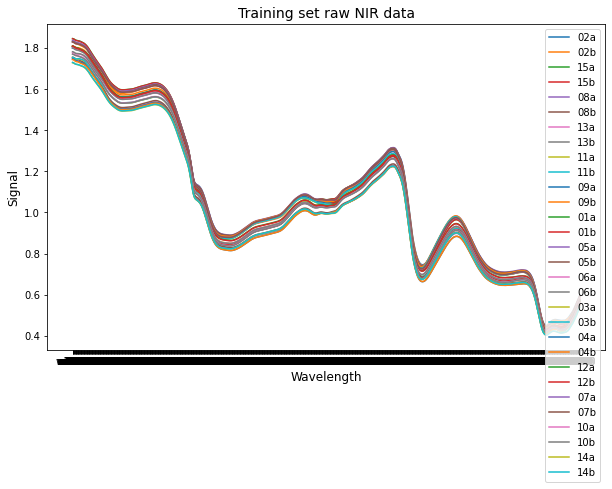

In [5]:
plt.figure(figsize=(10,6))

for i in range(len(X_train.transpose().columns)):
    plt.plot(X_train.transpose().iloc[:,i],label= X_train.transpose().iloc[:,i].name)

plt.legend()
plt.title('Training set raw NIR data',fontsize=14)
plt.xlabel('Wavelength',fontsize=12)

plt.ylabel('Signal',fontsize=12)

    B. Pre-process the NIR data and perform PCA for 5 components.

In [6]:
#scale the data
scaler = StandardScaler(with_std=False)
X_train_scaled = scaler.fit_transform(X_train)

#perform PCA and extract the scores
pca = PCA(n_components=5, svd_solver='full')
pca_scores = pca.fit_transform(X_train_scaled)
scores_pd = pd.DataFrame(data = pca_scores, 
                         columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], 
                         index = X_train.index)
scores_pd

,PC1,PC2,PC3,PC4,PC5
OBSNAM,,,,,
02a,-1.078295,-0.047001,0.251280,0.024857,0.003036
02b,-0.929153,-0.060230,0.245587,0.000213,-0.003432
15a,-1.022756,-0.305001,-0.042607,0.020161,-0.021894
15b,-1.019964,-0.295982,-0.037858,0.021896,-0.026418
08a,-1.184856,-0.018965,0.083824,-0.021246,-0.009141
08b,-1.095564,0.004305,0.085434,-0.023682,-0.008591
13a,-0.429080,0.383454,-0.016684,0.107723,-0.004963
13b,-0.482592,0.379079,-0.008178,0.101704,-0.004043
11a,0.070632,-0.290886,-0.044821,0.048580,-0.003262


In [7]:
# Extract the loadings
loadings_pd = pd.DataFrame(data = pca.components_.T, 
                           columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], 
                           index = X_train.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


    C. Plot the cumulative explained variance versus the number of components. How many components do we need to capture 99% of the variance?

In [8]:
pca_per = pca.explained_variance_ratio_
pca_2 = pca_per[0] + pca_per[1]
pca_3 = pca_per[0] + pca_per[1] + pca_per[2]
pca_4 = pca_per[0] + pca_per[1] + pca_per[2] + pca_per[3]
pca_5 = pca_per[0] + pca_per[1] + pca_per[2] + pca_per[3] + pca_per[4]
print(f'We need three principal components that can capture {round(pca_3,5)} variance.')

We need three principal components that can capture 0.99608 variance.


<Figure size 576x432 with 0 Axes>

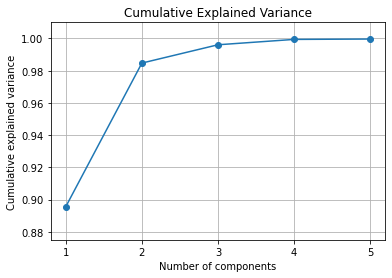

In [9]:
plt.figure(figsize=(8,6))

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot([1,2,3,4,5], 
         [pca_per[0],pca_2,pca_3,pca_4,pca_5],
         '-o')

plt.title ('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.ylim(0.875,1.01)
plt.grid()
plt.show()

    D. Plot the PCA scores for the first two components. Comment on any outliers, trends,clusters etc (if any).
    
<div style='color:purple'>   
The potential outlier sample is 03. There are a cluster of data points in 02a,02b,08a,08b,07a,07b.Except sample 09,05,11, the two different measurements indicates that the same sample locate together.

<Figure size 720x432 with 0 Axes>

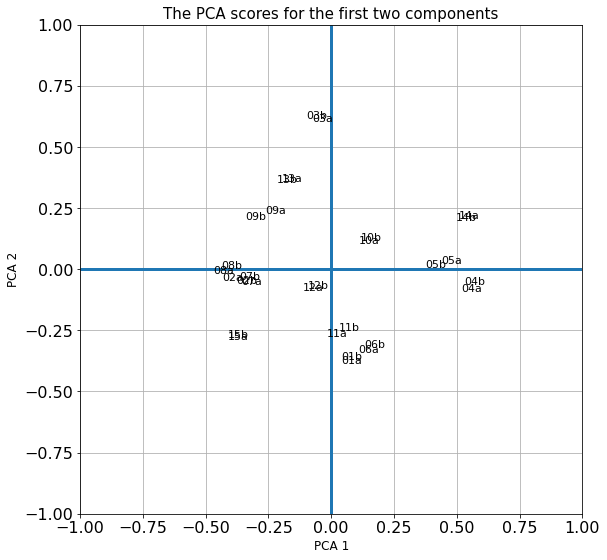

In [10]:
plt.figure(figsize=(10,6))

xt = pca_scores[:,:2][:,0]
yt = pca_scores[:,:2][:,1]
scalext = 1/(xt.max() - xt.min())
scaleyt = 1/(yt.max() - yt.min())
xt_scaled = xt * scalext
yt_scaled = yt * scaleyt
    
fig = plt.figure(figsize=(9, 9))
for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, scores_pd.index):
    #
    plt.text(x, y, label, ha='center', size=11)
        
plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel("PCA 2", fontsize=12)
plt.title('The PCA scores for the first two components', fontsize=15)
plt.tick_params(labelsize=16)
plt.grid()
plt.show()

    E. Plot the loadings of the first two components and comment on which wavelengths seem to be important for different PCs. Don't describe the graphs in words. In two sentences, describe any significant trends or signals (if any).
    
<div style='color:purple'>    
For PC1, the wavelengths 1980 to 2010 nm and 1115 to 1122 nm are important, but all wavelengths take negative effects. For PC2,  wavelengths from 1100-1115nm, 1140-1155nm are important some wavelengths about 2000nm indicates positive effects, and other wavelengths from 1100-1150nm seems have negative effects.

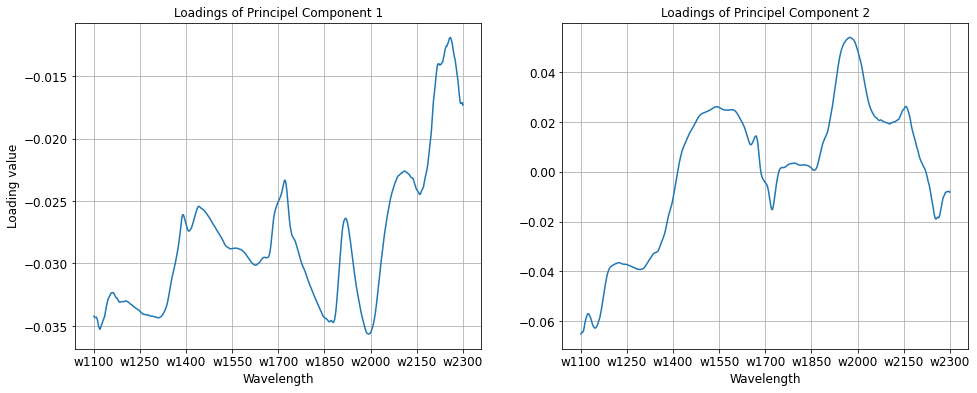

In [11]:
fig0 = plt.figure(figsize=(16, 6))

ax = plt.subplot(1, 2, 1)
plt.plot(loadings_pd['PC1'])
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Loading value', fontsize=12)
plt.title('Loadings of Principel Component 1', fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=12)
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(loadings_pd['PC2'])
plt.xlabel('Wavelength', fontsize=12)
plt.title('Loadings of Principel Component 2', fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=12)
plt.grid()

plt.show()

    F. Apply the dimensionality reduction with the PCA model you developed in step B for the test set using the transform method.

In [12]:
sawdust_pred = pd.read_excel('sawdust_pred.xlsx')
#drop "Primary ID" and reindex
sawdust_pred = sawdust_pred.drop(['Primary ID'], axis = 1)
sawdust_pred.set_index("OBSNAM", inplace=True)

#split Y_test from train
Y_test = sawdust_pred.iloc[:,-3:]
#get X_test
X_test = sawdust_pred.iloc[:,:-3]


In [13]:
#Standardize data (only transform)
X_test_scaled = scaler.transform(X_test)
new_pca_scores = pca.transform(X_test_scaled)
#Extract the scores
new_scores_pd = pd.DataFrame(data = new_pca_scores, 
                             columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], 
                             index = X_test.index)

    G. Create a scatter plot of the scores in PC1, PC2 of all 54 points in the train and test data set, coloured by the set they belong to (suggestion: use sns.scatterplot). Why is it important to overlap the scores of both train and test set in one graph? What are you checking to see?

<div style='color:purple'> 
Is it important to overlap the scores of both train and test set in one graph becauseit can help us better determine outliers and view if the testset is biased. the model generated from training set can't capture enough realation of data if the test data are spread too far away from the training dataset

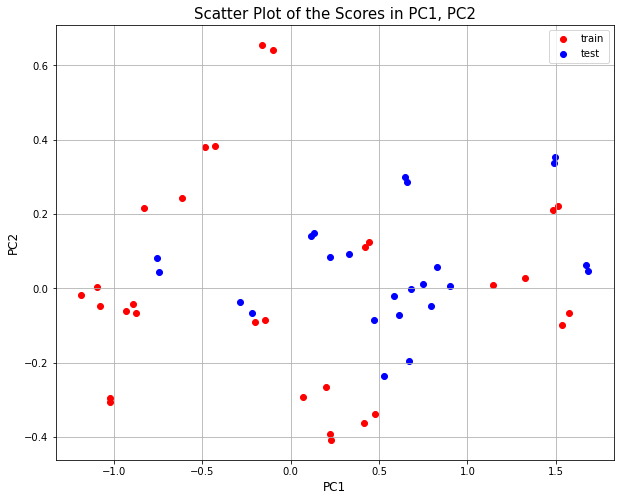

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(scores_pd['PC1'],scores_pd['PC2'],color='red',label = 'train')
plt.scatter(new_scores_pd['PC1'],new_scores_pd['PC2'],color='blue',label = 'test')
plt.legend()
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Scatter Plot of the Scores in PC1, PC2', fontsize=15)
plt.grid()
plt.show()

### 3.3 Task #2: Supervised learning, PLS model
    A. Run the PLS regression to model all 3 outputs with the scaled train set spectra.Increase the number of components to achieve R2 value of at least 0.92 (use PLSRegression’s method score to estimate R2).

In [15]:
pls_sklearn = PLSRegression(n_components=3, scale=False)
pls_sklearn.fit(X_train_scaled, Y_train)
print(f'When the number of components is 3, the achieve R2 is {round(pls_sklearn.score(X_train_scaled, Y_train),5)}.')

When the number of components is 3, the achieve R2 is 0.92404.


    B. Predict the output values for the inputs in the test set and compare them by plotting the 24 actual vs predicted values in a 1x3 subplot (for spruce, pine and birch,respectively). Also, include the y=x line for reference.

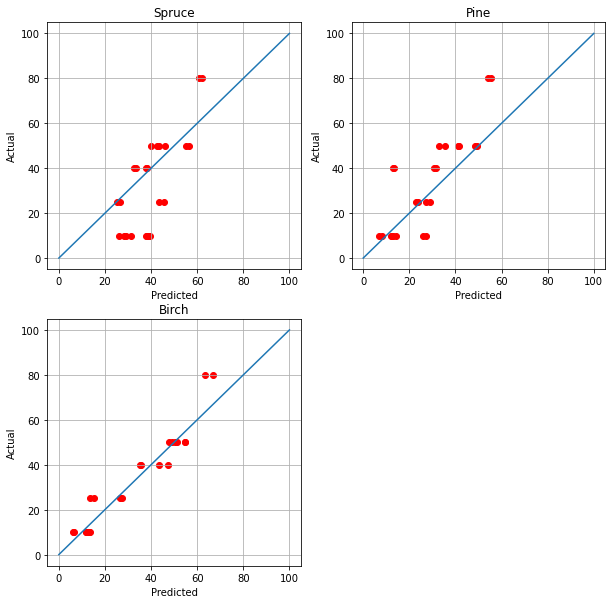

In [16]:
#Predict the output values for the inputs in the test set 
y_test_predicted = pls_sklearn.predict(X_test_scaled)


plt.figure(figsize=(10, 10))

ax = plt.subplot(2, 2, 1)
plt.scatter(y_test_predicted[:,0], Y_test['Spruce'], color = 'r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Spruce')
plt.grid()

ax = plt.subplot(2, 2, 2)
plt.scatter(y_test_predicted[:,1], Y_test['Pine'],color = 'r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Pine')
plt.grid()

ax = plt.subplot(2, 2, 3)
plt.scatter(y_test_predicted[:,2], Y_test['Birch'], color = 'r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Birch')
plt.grid()

plt.show()